In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [17]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/New_Report.xlsx")

In [18]:
data_1 = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/ФАКТ.xlsx")

In [19]:
df = pd.DataFrame(data)

# Конвертація 'Місяць' в категориальний тип 
df['Місяць'] = pd.Categorical(df['Місяць'], categories=['Лис', 'Гру', 'Січ', 'Лют'], ordered=True)

# групіровка 
grouped = df.groupby(['Магазин', df['Місяць']], observed=False)

# дадаємо 'План продажів' по місяцях
grouped_data = df.groupby(['Місяць', 'Магазин'], observed=False)['План продажів'].sum().reset_index()

df = pd.DataFrame(grouped_data)

In [20]:
from datetime import datetime
df_1 = pd.DataFrame(data_1)

# Перетворення стовпця з датами в об'єкт datetime
df_1['Дата'] = pd.to_datetime(df_1['Дата'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Створення нового стовпця з місяцем
df_1['Місяць'] = df_1['Дата'].dt.strftime('%m')
df_1['Місяць']

df_1['Місяць'] = pd.Categorical(df_1['Місяць'], categories=['11', '12', '01', '02'], ordered=True)

# словник для заміни
replace_dict = {"11": "Лис", "12": "Гру", "01": "Січ", "02": "Лют"}

df_1["Місяць"] = df_1["Місяць"].astype(str).replace(replace_dict)

# дадаємо 'План продажів'
grouped_data_1 = df_1.groupby(['Місяць', 'Магазин'])['Сума'].sum().reset_index()

df_1 = pd.DataFrame(grouped_data_1)

In [21]:
# дані з двох таблиць 
df_3 = pd.merge(df, df_1, on=['Місяць', 'Магазин']) 
# додаем % виконання плану
df_3['Виконання плану %'] = round((df_3['Сума'] / df_3['План продажів']) * 100, 1)
df_3.head(5)

,Місяць,Магазин,План продажів,Сума,Виконання плану %
0,Лис,ТП-1,380541,381684,100.3
1,Лис,ТП-2,379762,360906,95.0
2,Лис,ТП-3,870978,885324,101.6
3,Лис,ТП-4,853536,803708,94.2
4,Лис,ТП-5,426276,411626,96.6


In [22]:
# Фільтруємо період до змін в поставках
df_4 = pd.merge(df, df_1, on=['Місяць', 'Магазин']) 
df_4_1 = df_4[df_4['Місяць'].isin(['Лис', 'Гру'])]

# план продажів до 1.01.23
grouped_data_4_1 = df_4_1.groupby(['Магазин'])['План продажів'].sum()

In [23]:
# продажі до 1.01.23
grouped_data_4_2 = df_4_1.groupby(['Магазин'])['Сума'].sum()
#дата фрейм до змін в поставках 
df_4_3 = pd.merge(grouped_data_4_1, grouped_data_4_2, on=['Магазин'])

df_4_3['Виконання плану % до змін в поставках'] = round((df_4_3['Сума'] / df_4_3['План продажів']) * 100, 1)
df_4_3.drop(columns=['План продажів','Сума'],inplace=True)
#виконання плану до змін в поставках
df_4_3

,Виконання плану % до змін в поставках
Магазин,
ТП-1,96.5
ТП-2,97.0
ТП-3,97.9
ТП-4,96.0
ТП-5,95.8
ТП-6,98.1
ТП-7,98.1
ТП-8,103.4


In [24]:
# допоможе знайти кореляцію  % відхилиння від плану продажів після 1.01.2023. Ми маємо зрозуміти, чи є зростання % продажів
# в 1 групі магазинів по відношенню до 2 групи. 

# додаємо ще одну змінну - % відхилиння від плану продажів
df_3['%відхилення від плану продажів'] = round((df_3['Сума'] - df_3['План продажів']) / df_3['План продажів'], 3)*100

# розділимо магазини на дві групи. group_1 - з 1.01. були зміни в поставках
group_1 = ['ТП-3', 'ТП-5', 'ТП-7']
group_2 = ['ТП-1', 'ТП-2', 'ТП-4', 'ТП-6', 'ТП-8']

# Додаємо стовпець 'Група' у DataFrame
df_3['Група'] = df_3['Магазин'].apply(lambda x: 'група 1' if x in group_1 else 'група 2')

# берем тільки січ та лютий для аналізу 
df_3 = df_3[df_3['Місяць'].isin(['Січ', 'Лют'])]


In [25]:
df_3_1 = pd.merge(df_3, df_4_3, on=['Магазин']) # Додаємо стовпець 'Виконання плану % до змін в поставках'
df_3_1.head(5)

,Місяць,Магазин,План продажів,Сума,Виконання плану %,%відхилення від плану продажів,Група,Виконання плану % до змін в поставках
0,Січ,ТП-1,379708,395499,104.2,4.2,група 2,96.5
1,Лют,ТП-1,417997,421565,100.9,0.9,група 2,96.5
2,Січ,ТП-2,364043,378014,103.8,3.8,група 2,97.0
3,Лют,ТП-2,377050,388565,103.1,3.1,група 2,97.0
4,Січ,ТП-3,794865,811276,102.1,2.1,група 1,97.9


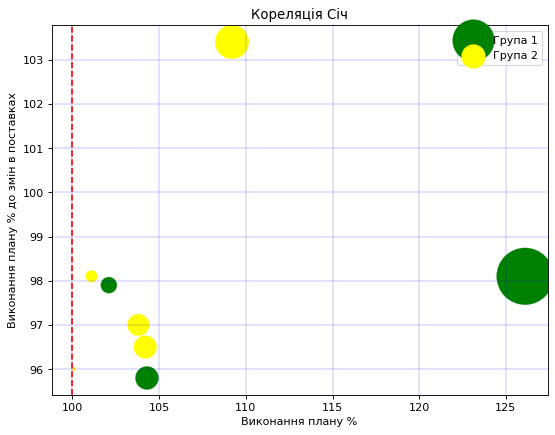

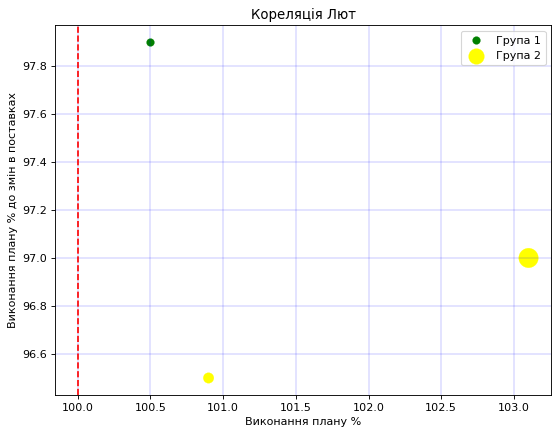

In [26]:
# Відфільтрувати рядки з негативним '%відхилення від плану продажу' оскільки ми шукаємо кореляцію з приростом
df_3_1 = df_3_1[df_3_1['%відхилення від плану продажів'] >= 0] 

data = pd.DataFrame(df_3_1)

mu = 100

# ділимо данні на дві групи 
group_1 = data[data["Магазин"].isin(['ТП-3', 'ТП-5', 'ТП-7'])]
group_2 = data[data["Магазин"].isin(['ТП-1', 'ТП-2', 'ТП-4', 'ТП-6', 'ТП-8'])]

# діаграма 
months = data["Місяць"].unique()

for month in months:
    plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    
    # дані по місяцях
    month_data = data[data["Місяць"] == month]
    group_1_month = group_1[group_1["Місяць"] == month]
    group_2_month = group_2[group_2["Місяць"] == month]
    
    # побудова діаграм
    plt.scatter(group_1_month["Виконання плану %"], 
                group_1_month["Виконання плану % до змін в поставках"], 
                s=group_1_month["%відхилення від плану продажів"] * 100, 
                c='green', label='Група 1', linewidth=0.2)
    plt.scatter(group_2_month["Виконання плану %"], 
                group_2_month["Виконання плану % до змін в поставках"], 
                s=group_2_month["%відхилення від плану продажів"] * 100, 
                c='yellow', label='Група 2', linewidth=0.2)
    
    plt.legend(loc='upper right', ncols=1)
    plt.xlabel('Виконання плану %')
    plt.ylabel('Виконання плану % до змін в поставках')
    plt.title(f'Кореляція {month}')
    plt.grid(color='b', linestyle='-', linewidth=0.2) 
    plt.axvline(mu, color='r', linestyle='--')
    
    plt.show()



In [27]:
# Січень. Всі магазини виконали план. 
# В групі зі зміненим графіком один магазин ТП-7 має аномальний процент виконання плану, 
# що вплинуло на показники всієї групи в порівнянні періодів. 
# Інші магазини в групі (ТП-3 та ТП-4) не відрізняються від групи без змін в графіку поставок. 

# Лютий. Тільки три магазини виконали план. 
# Один з них ТП-3  з групи зі зміненем графіком поставок має незначуще відхилення від плану: 0,5 %.  
# Можна зробити висновок, що зміна графіку поставок не вплинула на рівень виконання плану.
# Для більш точного аналізу можна збільшити періоди для порівнянь.Чим більше даних тим точніше аналіз.  